# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("classic")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338745 entries, 0 to 2338744
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21094
Address                             12
Zip Code                         14532
Council District                 47541
APD Sector                        9247
APD District                      9735
PRA                              11029
Census Tract                    476516
Clearance Status                610927
Clearance Date                  341734
UCR Category                   1539360
Category Description           1539360
X-coordinate                     10428
Y-coordinate                     10428
Latitude                         39640
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2338740      20143631822           FAMILY DISTURBANCE                  3400   
2338741      20191270738         THEFT BY SHOPLIFTING                   607   
2338742       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2338743    2003921400113                          DWI                  2100   
2338744      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2338740               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2338741               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2338742               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2338743               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2338744               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2338740  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2338741  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2338742  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2338743  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2338744  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2338740              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2338741   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2338742         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2338743  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2338744  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District  PRA  Census Tract  \
2338740               4.0         ED            1  240         18.23   
2338741               7.0         ED            4  221         18.24   
2338742               1.0         ID            5  293         21.00   
2338743              10.0         BA            6  325          1.00   
2338744               9.0         GE            2  382         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2338740                N     01/02/2015          NaN                  NaN   
2338741              NaN            NaN          23C                Theft   
2338742              NaN            NaN          NaN                  NaN   
2338743                C     05/22/2003          NaN                  NaN   
2338744                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2338740     3130776.0     3130776.0  30.369795 -97.687855   
2338741     3131578.0     3131578.0  30.383630 -97.684932   
2338742     3130390.0     3130390.0  30.320281 -97.690437   
2338743     3109748.0     3109748.0  30.320565 -97.755869   
2338744     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2338740  (30.36979494, -97.68785533)  
2338741  (30.38362955, -97.68493154)  
2338742   (30.32028083, -97.6904366)  
2338743   (30.32056515, -97.7558693)  
2338744  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

704

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2338041 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          SEXUAL ASSAULT OF CHILD/OBJECT           False   
2003-01-01                     FORGERY AND PASSING           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   

                      report_date_time                 location_type  \
occurred_date_time                                                     
2003-01-01         2010-04-14 14:59:00              RESIDENCE / HOME   
2003-01-01         2005-03-31 16:40:00              RESIDENCE / HOME   
2003-01-01         2003-09-13 09:35:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01         2012-12-27 16:17:00              RESIDENCE / HOME   
2003-01-01         2005-02-14 17:30:00  COMMERCIAL / OFFICE BUILDING   

                                         address zip_code council_district  \
occurred_date_time                                                           
2003-01-01                         1088 PARK PLZ  78753.0              4.0   
2003-01-01          6600 BLOCK ED BLUESTEIN BLVD  78723.0              NaN   
2003-01-01                        8501 BURNET RD  78757.0              7.0   
2003-01-01                       1738 RUTLAND DR  78758.0              4.0   
2003-01-01                          715 E 8TH ST  78701.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 ED            3  251.0          NaN   
2003-01-01                 ED            3    299      2201.00   
2003-01-01                 ID            7  234.0        18.18   
2003-01-01                 ED            2  219.0        18.21   
2003-01-01                 GE            2  382.0        11.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                     True     2010-04-15                  NaN   
2003-01-01                     True     2005-07-12                 Rape   
2003-01-01                      NaN     2003-09-15                  NaN   
2003-01-01                    False     2012-12-28                  NaN   
2003-01-01                      NaN            NaT                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.348871 -97.685233  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.366117 -97.727721  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.376093 -97.710471  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.267553 -97.734674  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    209436
78753.0    181749
78701.0    170393
78758.0    162237
78704.0    156929
78745.0    153073
78702.0    138237
78744.0    128174
78723.0    120198
78752.0     85674
78748.0     69367
78759.0     67585
78751.0     65136
78757.0     58903
78705.0     58016
78721.0     48356
78749.0     41043
78724.0     38244
78727.0     36566
78703.0     35763
78731.0     29246
78746.0     28498
78729.0     25840
78750.0     24197
78754.0     23460

zip_code
78741.0  0.090138
78753.0  0.078222
78701.0  0.073334
78758.0  0.069824
78704.0  0.067540
78745.0  0.065880
78702.0  0.059495
78744.0  0.055164
78723.0  0.051731
78752.0  0.036873
78748.0  0.029854
78759.0  0.029087
78751.0  0.028033
78757.0  0.025351
78705.0  0.024969
78721.0  0.020812
78749.0  0.017664
78724.0  0.016460
78727.0  0.015737
78703.0  0.015392
78731.0  0.012587
78746.0  0.012265
78729.0  0.011121
78750.0  0.010414
78754.0  0.010097

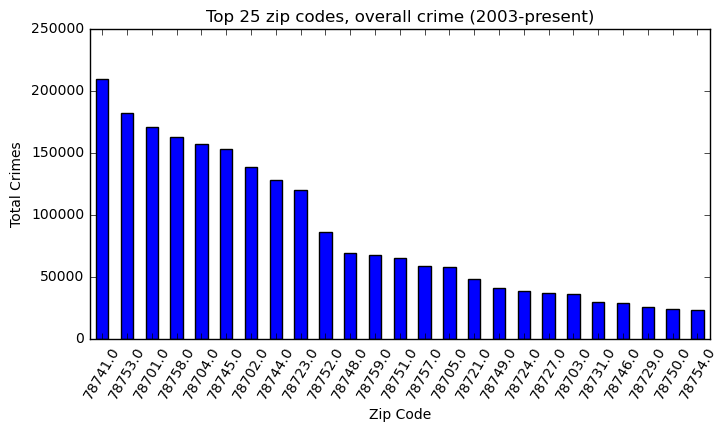

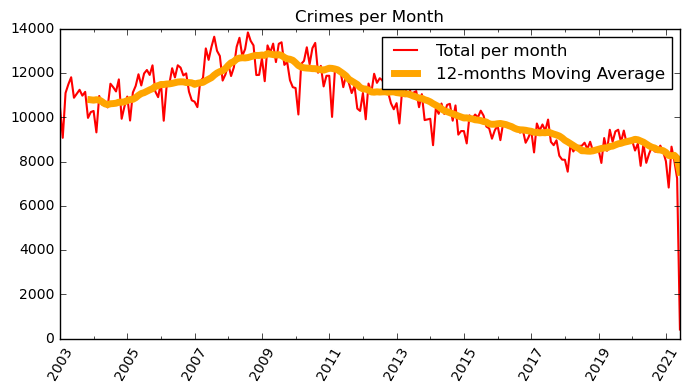

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(dpi=100, figsize=(8, 4))
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(dpi=100, figsize=(8, 4))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  232633
THEFT                                                213839
FAMILY DISTURBANCE                                   183000
CRIMINAL MISCHIEF                                    129186
ASSAULT W/INJURY-FAM/DATE VIOL                        79149
BURGLARY OF RESIDENCE                                 77702
DWI                                                   70192
PUBLIC INTOXICATION                                   69027
HARASSMENT                                            65047
DISTURBANCE - OTHER                                   62444

BURGLARY OF VEHICLE  CRIMINAL MISCHIEF  HARASSMENT  \
occurred_date_time                                                       
2003-01-31                         1225                722         293   
2003-02-28                         1110                594         309   
2003-03-31                         1222                700         363   
2003-04-30                         1396                709         353   
2003-05-31                         1487                750         345   
...                                 ...                ...         ...   
2021-02-28                          309                338         167   
2021-03-31                          432                430         195   
2021-04-30                          367                415         168   
2021-05-31                          329                368         136   
2021-06-30                           12                  9           8   

                    BURGLARY OF RESIDENCE  ASSAULT W/INJURY-FAM/DATE VIOL  \
occurred_date_time                                                          
2003-01-31                            328                             349   
2003-02-28                            248                             342   
2003-03-31                            393                             421   
2003-04-30                            398                             432   
2003-05-31                            436                             424   
...                                   ...                             ...   
2021-02-28                            118                             245   
2021-03-31                            154                             259   
2021-04-30                            129                             268   
2021-05-31                            151                             309   
2021-06-30                             12                              28   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  408                 505   4171  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-02-28                           62  130                 812   2181  
2021-03-31                           75  179                 876   2600  
2021-04-30                           67  125                 799   2338  
2021-05-31                           61  141                 789   2284  
2021-06-30                            8   11                  30    118  

[222 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

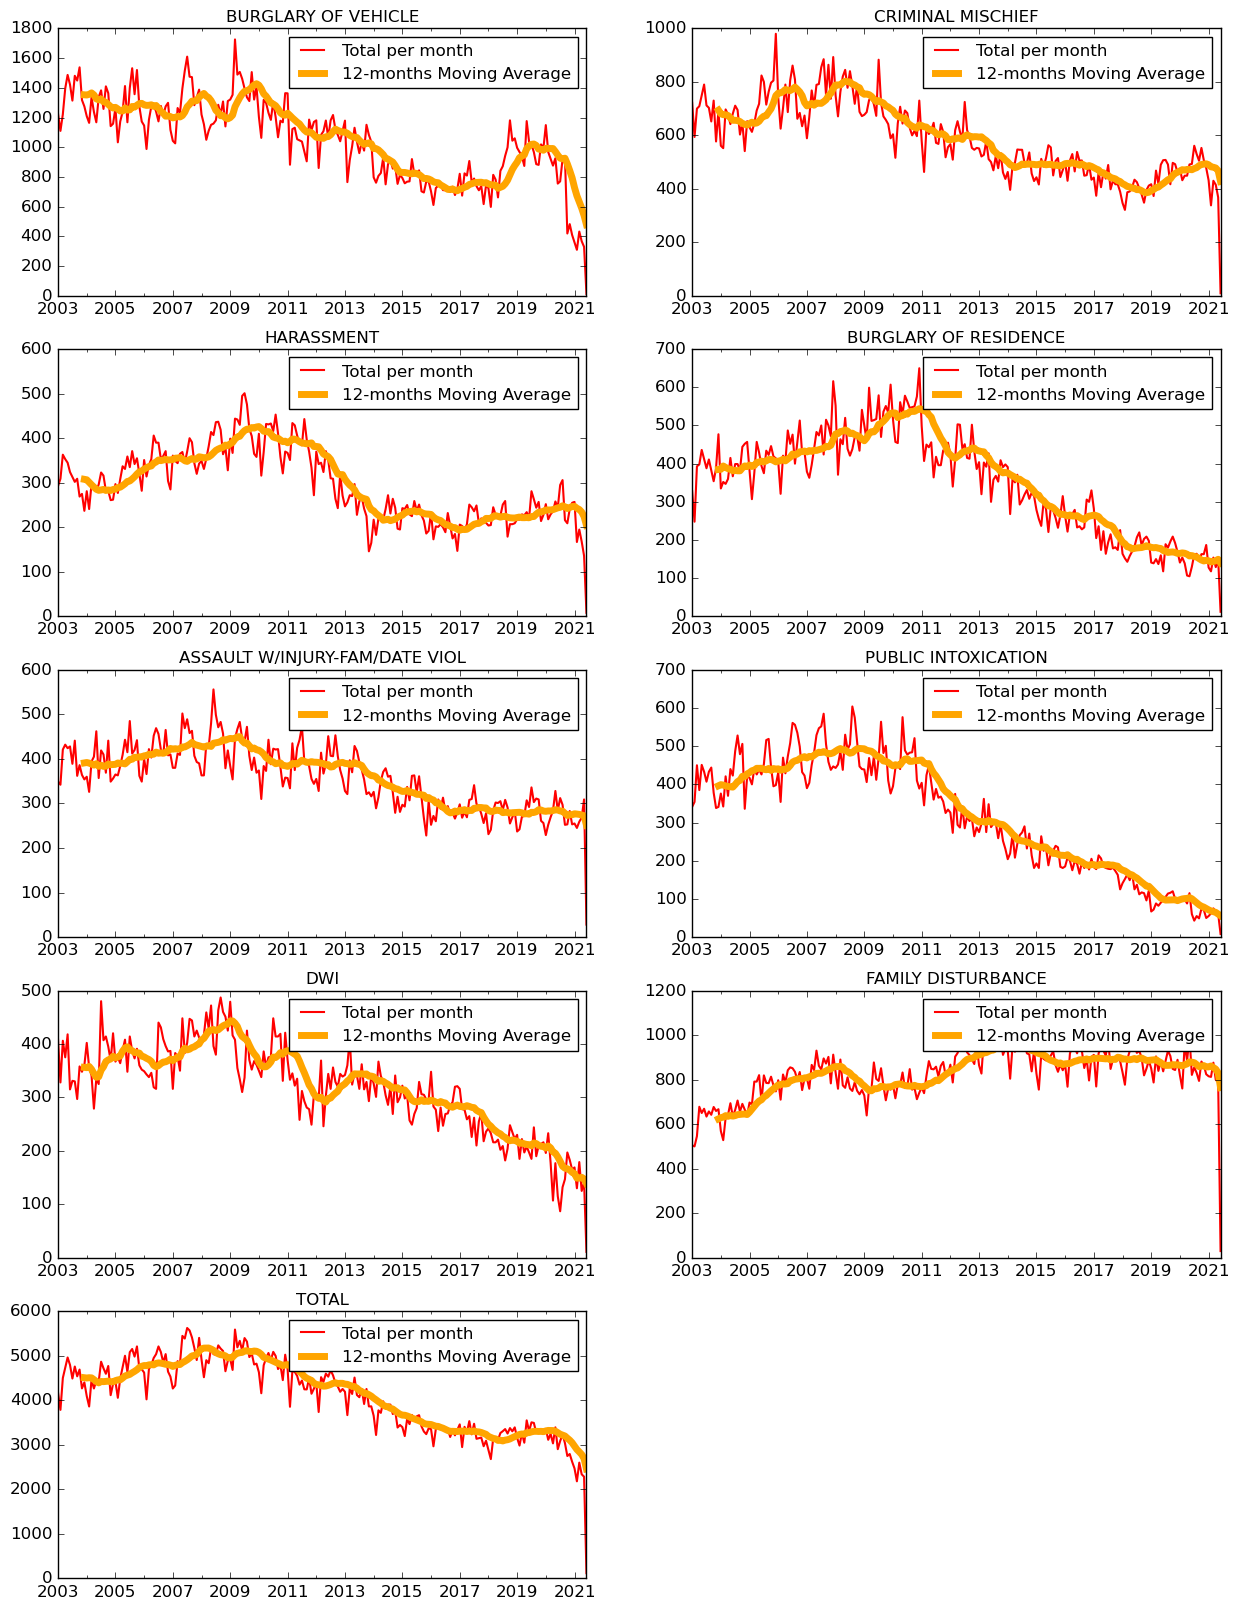

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17212
THEFT                                                 15968
BURGLARY OF VEHICLE                                    9344
WARRANT ARREST NON TRAFFIC                             8968
DWI                                                    8356
ASSAULT WITH INJURY                                    7655
VIOL CITY ORDINANCE - OTHER                            6192
POSS OF DRUG PARAPHERNALIA                             6099
CRIMINAL MISCHIEF                                      5920
CRIMINAL TRESPASS                                      3962
POSSESSION OF MARIJUANA                                3409
DISTURBANCE - OTHER                                    3398
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2929
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2636
CRIMINAL TRESPASS/TRANSIENT                            2594
THEFT OF BICYCLE                                       2545
URINATING IN PUBLIC PLACE                              2337
FAMILY DISTURBANCE                                     2212
DOC FIGHTING                                           2141
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1750

highest_offense_description
PUBLIC INTOXICATION                                0.101014
THEFT                                              0.093713
BURGLARY OF VEHICLE                                0.054838
WARRANT ARREST NON TRAFFIC                         0.052631
DWI                                                0.049040
ASSAULT WITH INJURY                                0.044926
VIOL CITY ORDINANCE - OTHER                        0.036340
POSS OF DRUG PARAPHERNALIA                         0.035794
CRIMINAL MISCHIEF                                  0.034743
CRIMINAL TRESPASS                                  0.023252
POSSESSION OF MARIJUANA                            0.020007
DISTURBANCE - OTHER                                0.019942
CUSTODY ARREST TRAFFIC WARR                        0.017565
POSS CONTROLLED SUB/NARCOTIC                       0.017190
CAMPING IN PARK                                    0.016345
VOCO - ALCOHOL  CONSUMPTION                        0.015787
ASSAULT BY CONTACT                                 0.015470
CRIMINAL TRESPASS/TRANSIENT                        0.015224
THEFT OF BICYCLE                                   0.014936
URINATING IN PUBLIC PLACE                          0.013715
FAMILY DISTURBANCE                                 0.012982
DOC FIGHTING                                       0.012565
PROTECTIVE ORDER                                   0.012319
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010270

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

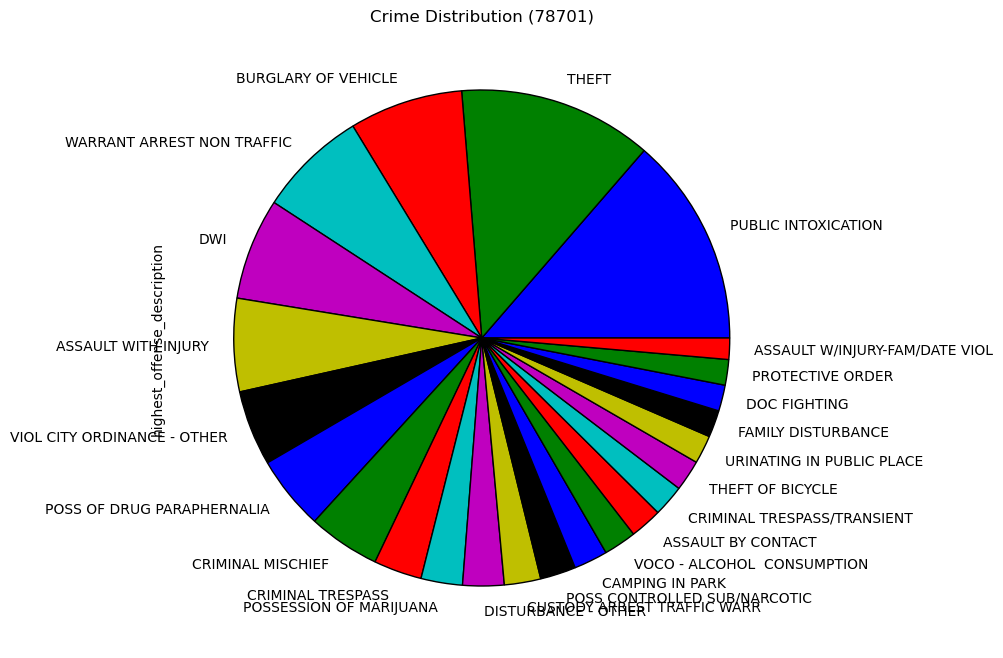

In [13]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

In [ ]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20665
BURGLARY OF VEHICLE                                   19939
THEFT                                                 15745
CRIMINAL MISCHIEF                                     11153
ASSAULT W/INJURY-FAM/DATE VIOL                         9724
BURGLARY OF RESIDENCE                                  8946
PUBLIC INTOXICATION                                    6402
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5709
HARASSMENT                                             5594
DISTURBANCE - OTHER                                    5229
AUTO THEFT                                             4741
ASSAULT WITH INJURY                                    4597
CRIMINAL TRESPASS                                      3983
POSS CONTROLLED SUB/NARCOTIC                           3906
POSSESSION OF MARIJUANA                                3806
THEFT BY SHOPLIFTING                                   3599
POSS OF DRUG PARAPHERNALIA                             3554
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2812
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098670
BURGLARY OF VEHICLE                                0.095203
THEFT                                              0.075178
CRIMINAL MISCHIEF                                  0.053253
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046429
BURGLARY OF RESIDENCE                              0.042715
PUBLIC INTOXICATION                                0.030568
CUSTODY ARREST TRAFFIC WARR                        0.028701
DWI                                                0.027259
HARASSMENT                                         0.026710
DISTURBANCE - OTHER                                0.024967
AUTO THEFT                                         0.022637
ASSAULT WITH INJURY                                0.021949
CRIMINAL TRESPASS                                  0.019018
POSS CONTROLLED SUB/NARCOTIC                       0.018650
POSSESSION OF MARIJUANA                            0.018173
THEFT BY SHOPLIFTING                               0.017184
POSS OF DRUG PARAPHERNALIA                         0.016969
WARRANT ARREST NON TRAFFIC                         0.016463
RUNAWAY CHILD                                      0.013427
VIOL CITY ORDINANCE - OTHER                        0.010490

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

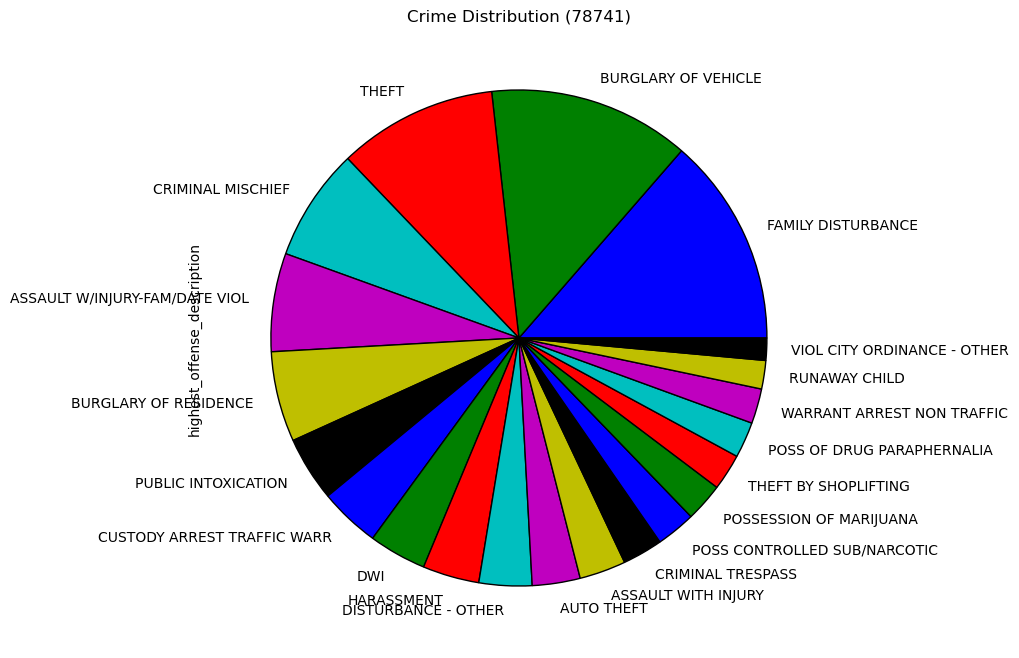

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15207
BURGLARY OF VEHICLE                                   14802
THEFT                                                 13678
CRIMINAL MISCHIEF                                      8632
BURGLARY OF RESIDENCE                                  5895
ASSAULT W/INJURY-FAM/DATE VIOL                         5822
HARASSMENT                                             5180
DISTURBANCE - OTHER                                    4581
DWI                                                    4454
PUBLIC INTOXICATION                                    4015
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2928
BURGLARY NON RESIDENCE                                 2899
ASSAULT WITH INJURY                                    2730
RUNAWAY CHILD                                          2623
POSSESSION OF MARIJUANA                                2597
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2059
THEFT BY SHOPLIFTING                                   2022
CRIMINAL TRESPASS                                      1979
IDENTITY THEFT                                         1678
POSS OF DRUG PARAPHERNALIA                             1529

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099345
BURGLARY OF VEHICLE                                0.096699
THEFT                                              0.089356
CRIMINAL MISCHIEF                                  0.056391
BURGLARY OF RESIDENCE                              0.038511
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038034
HARASSMENT                                         0.033840
DISTURBANCE - OTHER                                0.029927
DWI                                                0.029097
PUBLIC INTOXICATION                                0.026229
CUSTODY ARREST TRAFFIC WARR                        0.021219
AUTO THEFT                                         0.019128
BURGLARY NON RESIDENCE                             0.018939
ASSAULT WITH INJURY                                0.017835
RUNAWAY CHILD                                      0.017136
POSSESSION OF MARIJUANA                            0.016966
WARRANT ARREST NON TRAFFIC                         0.013804
POSS CONTROLLED SUB/NARCOTIC                       0.013451
THEFT BY SHOPLIFTING                               0.013209
CRIMINAL TRESPASS                                  0.012928
IDENTITY THEFT                                     0.010962
POSS OF DRUG PARAPHERNALIA                         0.009989

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

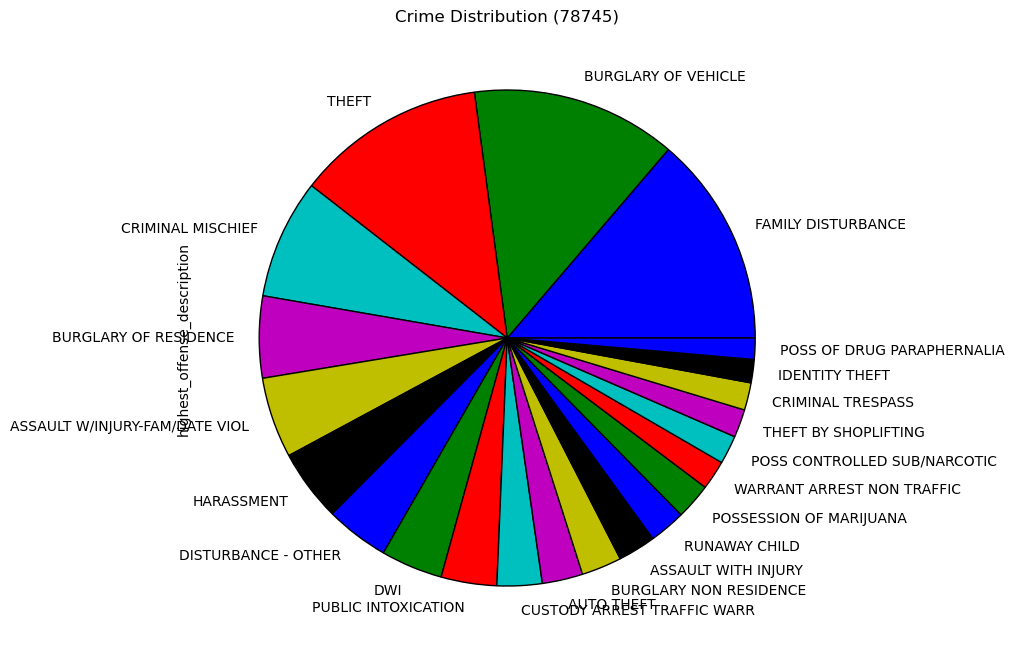

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8707
THEFT                                                  5664
CRIMINAL MISCHIEF                                      5016
THEFT OF BICYCLE                                       3541
PUBLIC INTOXICATION                                    2631
BURGLARY OF RESIDENCE                                  2137
WARRANT ARREST NON TRAFFIC                             1551
AUTO THEFT                                             1373
CRIMINAL TRESPASS                                      1373
ASSAULT WITH INJURY                                    1275
HARASSMENT                                             1237
FAMILY DISTURBANCE                                     1228
DWI                                                    1221
DISTURBANCE - OTHER                                    1129
BURGLARY NON RESIDENCE                                  889
CRIMINAL TRESPASS/TRANSIENT                             868
VIOL CITY ORDINANCE - OTHER                             792
GRAFFITI                                                786
CUSTODY ARREST TRAFFIC WARR                             782
ASSAULT W/INJURY-FAM/DATE VIOL                          708
POSSESSION OF MARIJUANA                                 664
ASSAULT BY CONTACT                                      629

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.150079
THEFT                                              0.097628
CRIMINAL MISCHIEF                                  0.086459
THEFT OF BICYCLE                                   0.061035
PUBLIC INTOXICATION                                0.045350
BURGLARY OF RESIDENCE                              0.036835
WARRANT ARREST NON TRAFFIC                         0.026734
AUTO THEFT                                         0.023666
CRIMINAL TRESPASS                                  0.023666
ASSAULT WITH INJURY                                0.021977
HARASSMENT                                         0.021322
FAMILY DISTURBANCE                                 0.021167
DWI                                                0.021046
DISTURBANCE - OTHER                                0.019460
BURGLARY NON RESIDENCE                             0.015323
CRIMINAL TRESPASS/TRANSIENT                        0.014961
VIOL CITY ORDINANCE - OTHER                        0.013651
GRAFFITI                                           0.013548
CUSTODY ARREST TRAFFIC WARR                        0.013479
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012204
POSSESSION OF MARIJUANA                            0.011445
ASSAULT BY CONTACT                                 0.010842

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

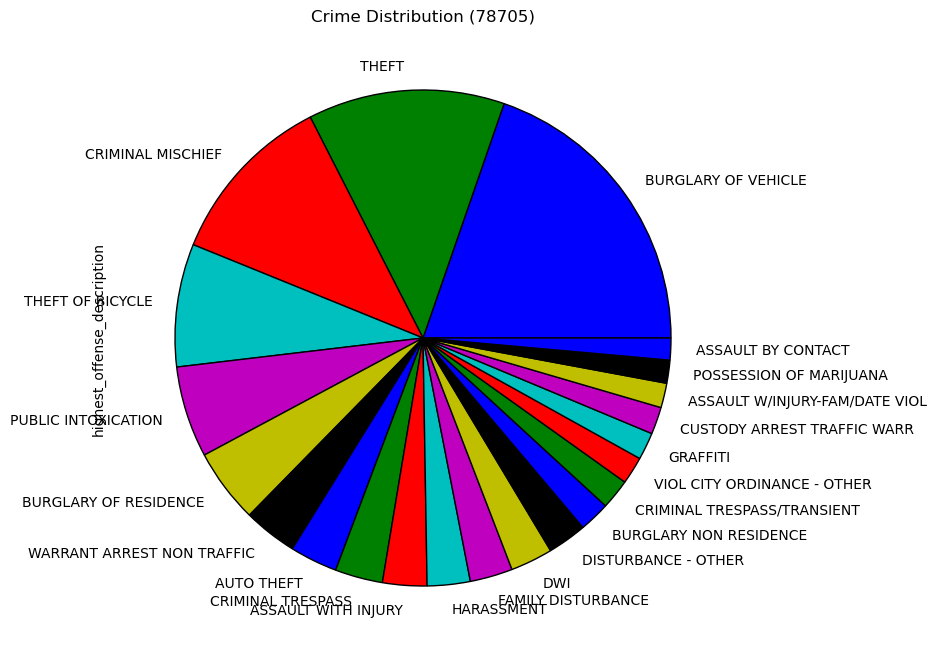

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5438
THEFT                                                  5114
THEFT BY SHOPLIFTING                                   2561
CRIMINAL MISCHIEF                                      1281
DWI                                                     890
FAMILY DISTURBANCE                                      775
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              637
AUTO THEFT                                              614
BURGLARY OF RESIDENCE                                   525
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          452
DISTURBANCE - OTHER                                     437
BURGLARY NON RESIDENCE                                  358
ASSAULT W/INJURY-FAM/DATE VIOL                          342
CRED CARD ABUSE - OTHER                                 330
PUBLIC INTOXICATION                                     321
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     199
VIOL WATER SAFETY ACT                                   195

highest_offense_description
BURGLARY OF VEHICLE                                0.190820
THEFT                                              0.179451
THEFT BY SHOPLIFTING                               0.089866
CRIMINAL MISCHIEF                                  0.044951
DWI                                                0.031230
FAMILY DISTURBANCE                                 0.027195
VIOL CITY ORDINANCE - OTHER                        0.022879
HARASSMENT                                         0.022352
AUTO THEFT                                         0.021545
BURGLARY OF RESIDENCE                              0.018422
THEFT FROM PERSON                                  0.016212
IDENTITY THEFT                                     0.015861
DISTURBANCE - OTHER                                0.015334
BURGLARY NON RESIDENCE                             0.012562
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012001
CRED CARD ABUSE - OTHER                            0.011580
PUBLIC INTOXICATION                                0.011264
POSSESSION OF MARIJUANA                            0.010422
FRAUD - OTHER                                      0.009966
SUSPICIOUS PERSON                                  0.009088
CUSTODY ARREST TRAFFIC WARR                        0.008667
WARRANT ARREST NON TRAFFIC                         0.007825
ASSAULT WITH INJURY                                0.006983
VIOL WATER SAFETY ACT                              0.006843

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

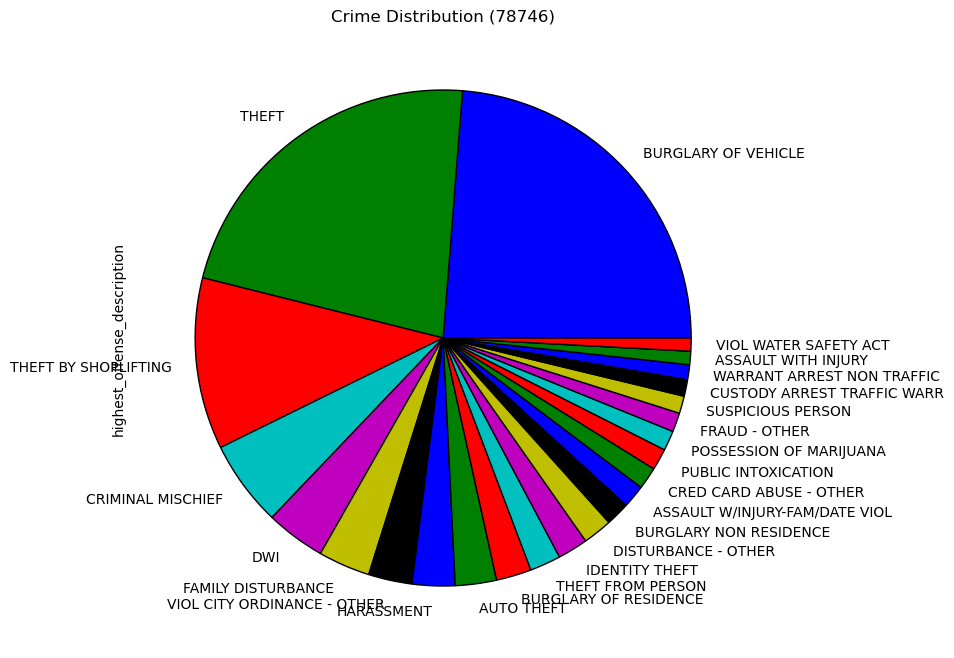

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

df.highest_offense_description = df.highest_offense_description.replace(
    {
        "CAPITAL MURDER": "MURDER",
        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
        "AGG ASSAULT": "AGGRAVATED ASSAULT",
    }
)

df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

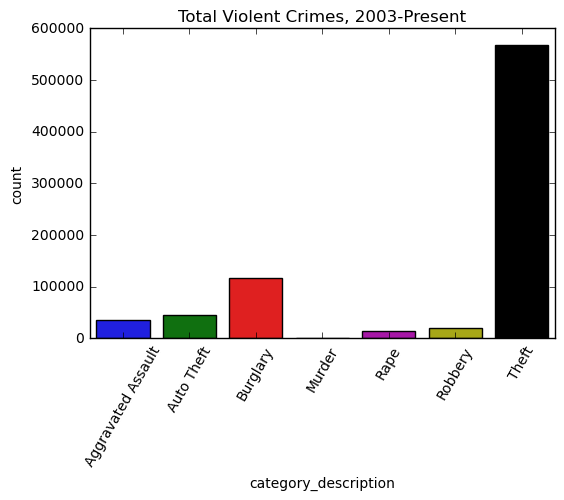

Theft                 567634
Burglary              116809
Auto Theft             44663
Aggravated Assault     35452
Robbery                20367
Rape                   13529
Murder                   545
Name: category_description, dtype: int64

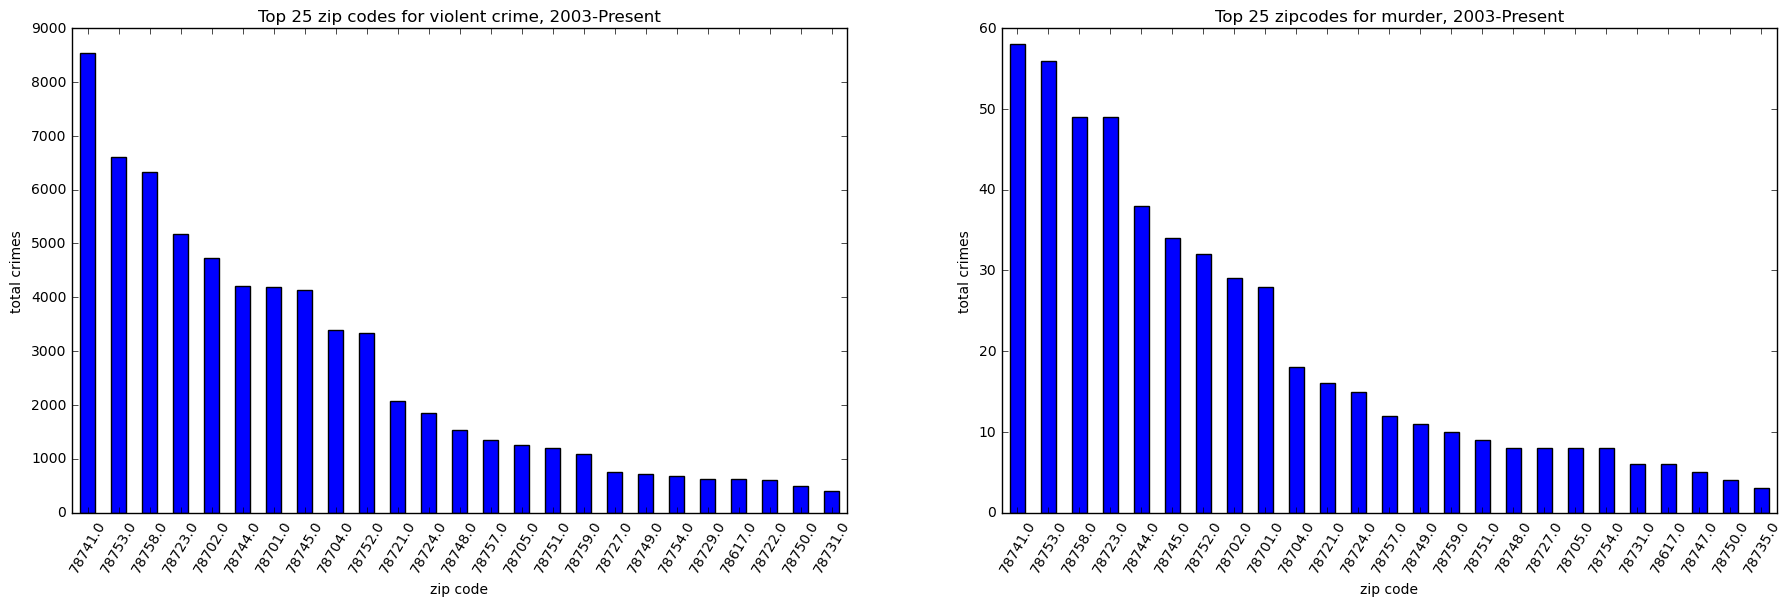

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              349       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        1
78653.0                               36       1     7        5
78660.0                              153       3    42       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2051      28   767     1349
78702.0                             2426      29   615     1654
78703.0                              166       2    85      113
78704.0                             1626      18   774      984
78705.0                              494       8   449      312
78712.0                                1       0     3        0
78717.0                              152       1    46       39
78719.0                               25       0     3       10
78721.0                             1296      16   311      443
78722.0                              268       3    98      241
78723.0                             2581      49   804     1744
78724.0                             1141      15   354      341
78725.0                               76       1    43       13
78726.0                              172       2    93       32
78727.0                              415       8   174      151
78728.0                               21       1    12        3
78729.0                              336       2   152      137
78730.0                               36       0    17        4
78731.0                              188       6   118       88
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    76       47
78736.0                               59       0    30       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4123      58  1367     2993
78742.0                               83       2    20       24
78744.0                             2336      38   894      933
78745.0                             2223      34   859     1023
78746.0                              127       3    77      133
78747.0                              236       5    94       45
78748.0                              830       8   381      317
78749.0                              359      11   202      144
78750.0                              256       4   138      105
78751.0                              520       9   279      392
78752.0                             1626      32   488     1185
78753.0                             3339      56  1136     2082
78754.0                              381       8   158      140
78756.0                              155       2    99       96
78757.0                              678      12   237      417
78758.0                             3108      49  1092     2073
78759.0                              546      10   254      274

<Figure size 432x288 with 0 Axes>

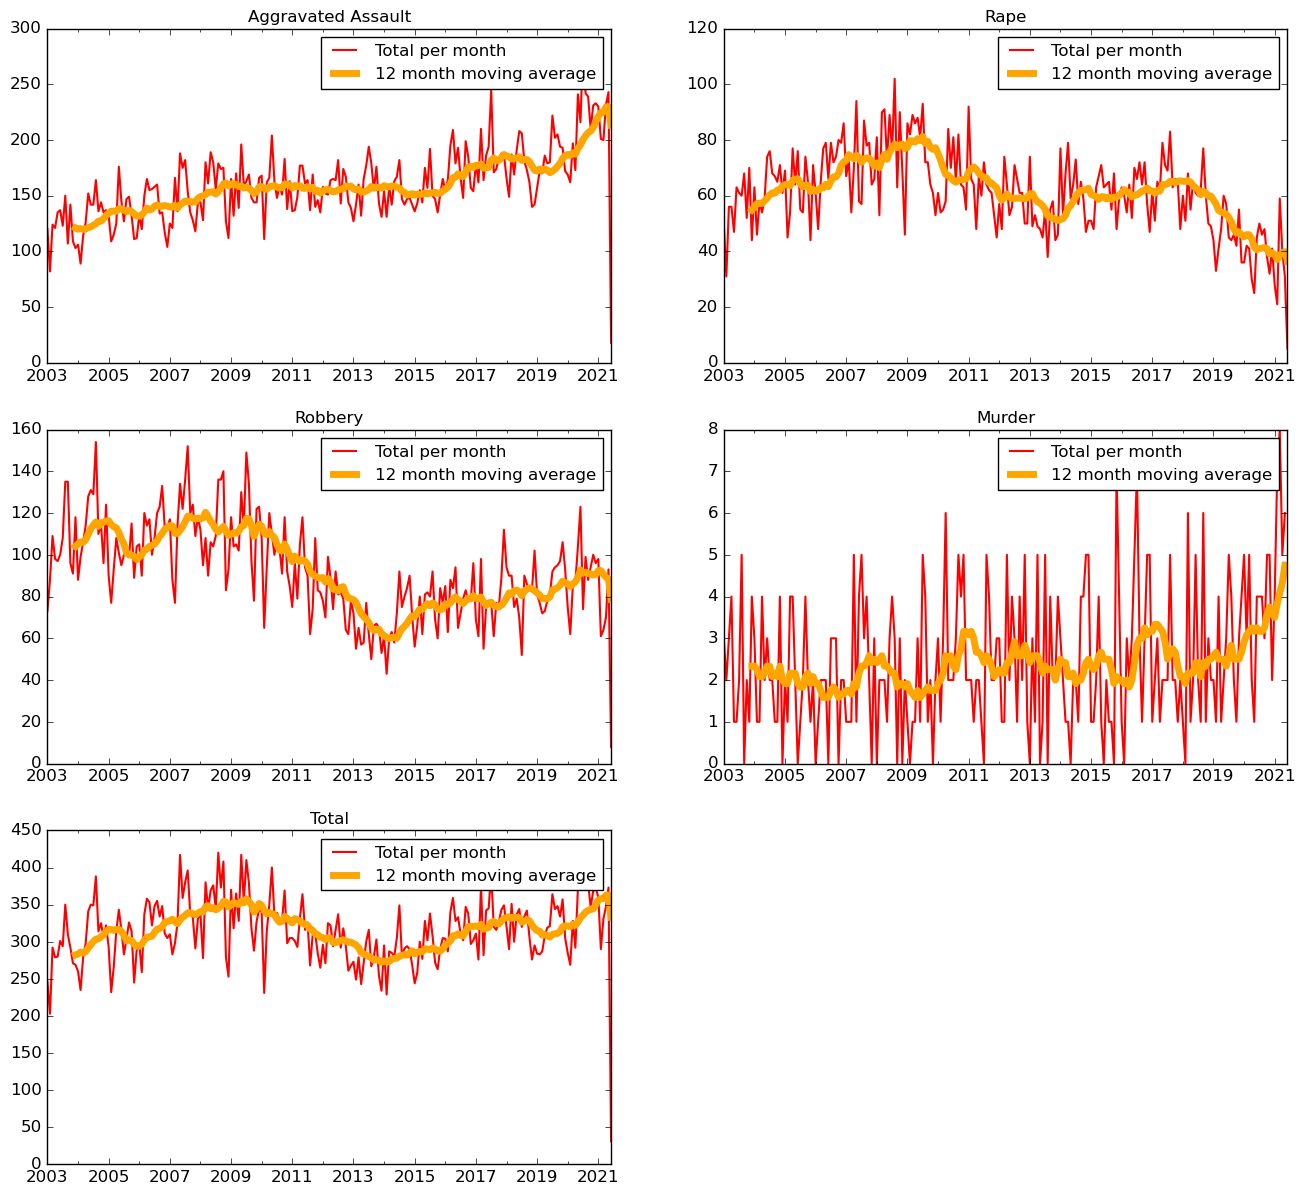

In [19]:
plt.figure(dpi=100)
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title("Total Violent Crimes, 2003-Present")
plt.show()

#display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

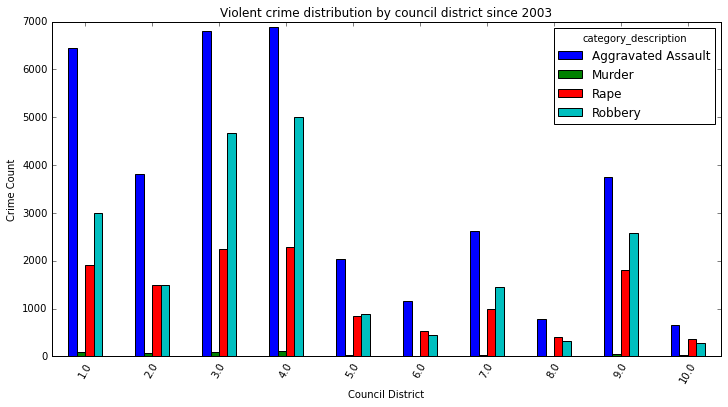

<Figure size 600x400 with 0 Axes>

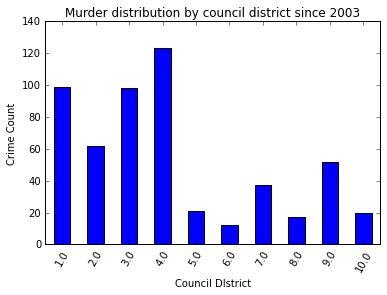

<Figure size 600x400 with 0 Axes>

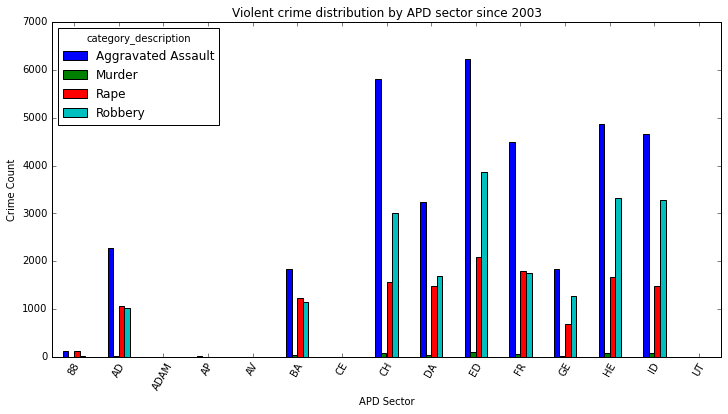

<Figure size 600x400 with 0 Axes>

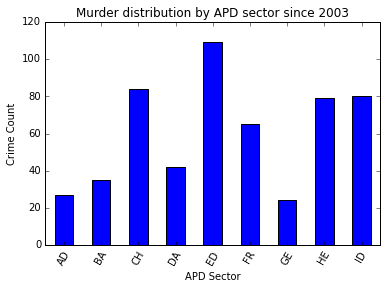

<Figure size 600x400 with 0 Axes>

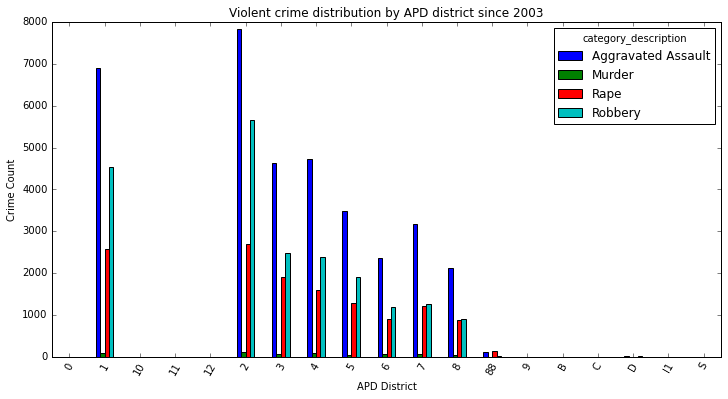

<Figure size 600x400 with 0 Axes>

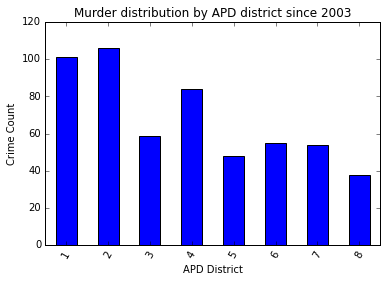

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   403       9   
COMMUNITY CENTER                                                 9       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              281       3   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             121       6   
FIELD / WOODS                                                  289      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         262       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           764      14   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                464      13   
PARK / PLAYGROUND                                              181       1   
PARKING LOTS / GARAGE                                         4881     101   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17691     235   
REST AREA                                                        2       0   
RESTAURANTS                                                    256       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      22       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8305     107   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 112       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     13       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      395  
BAR / NIGHT CLUB                                 157   

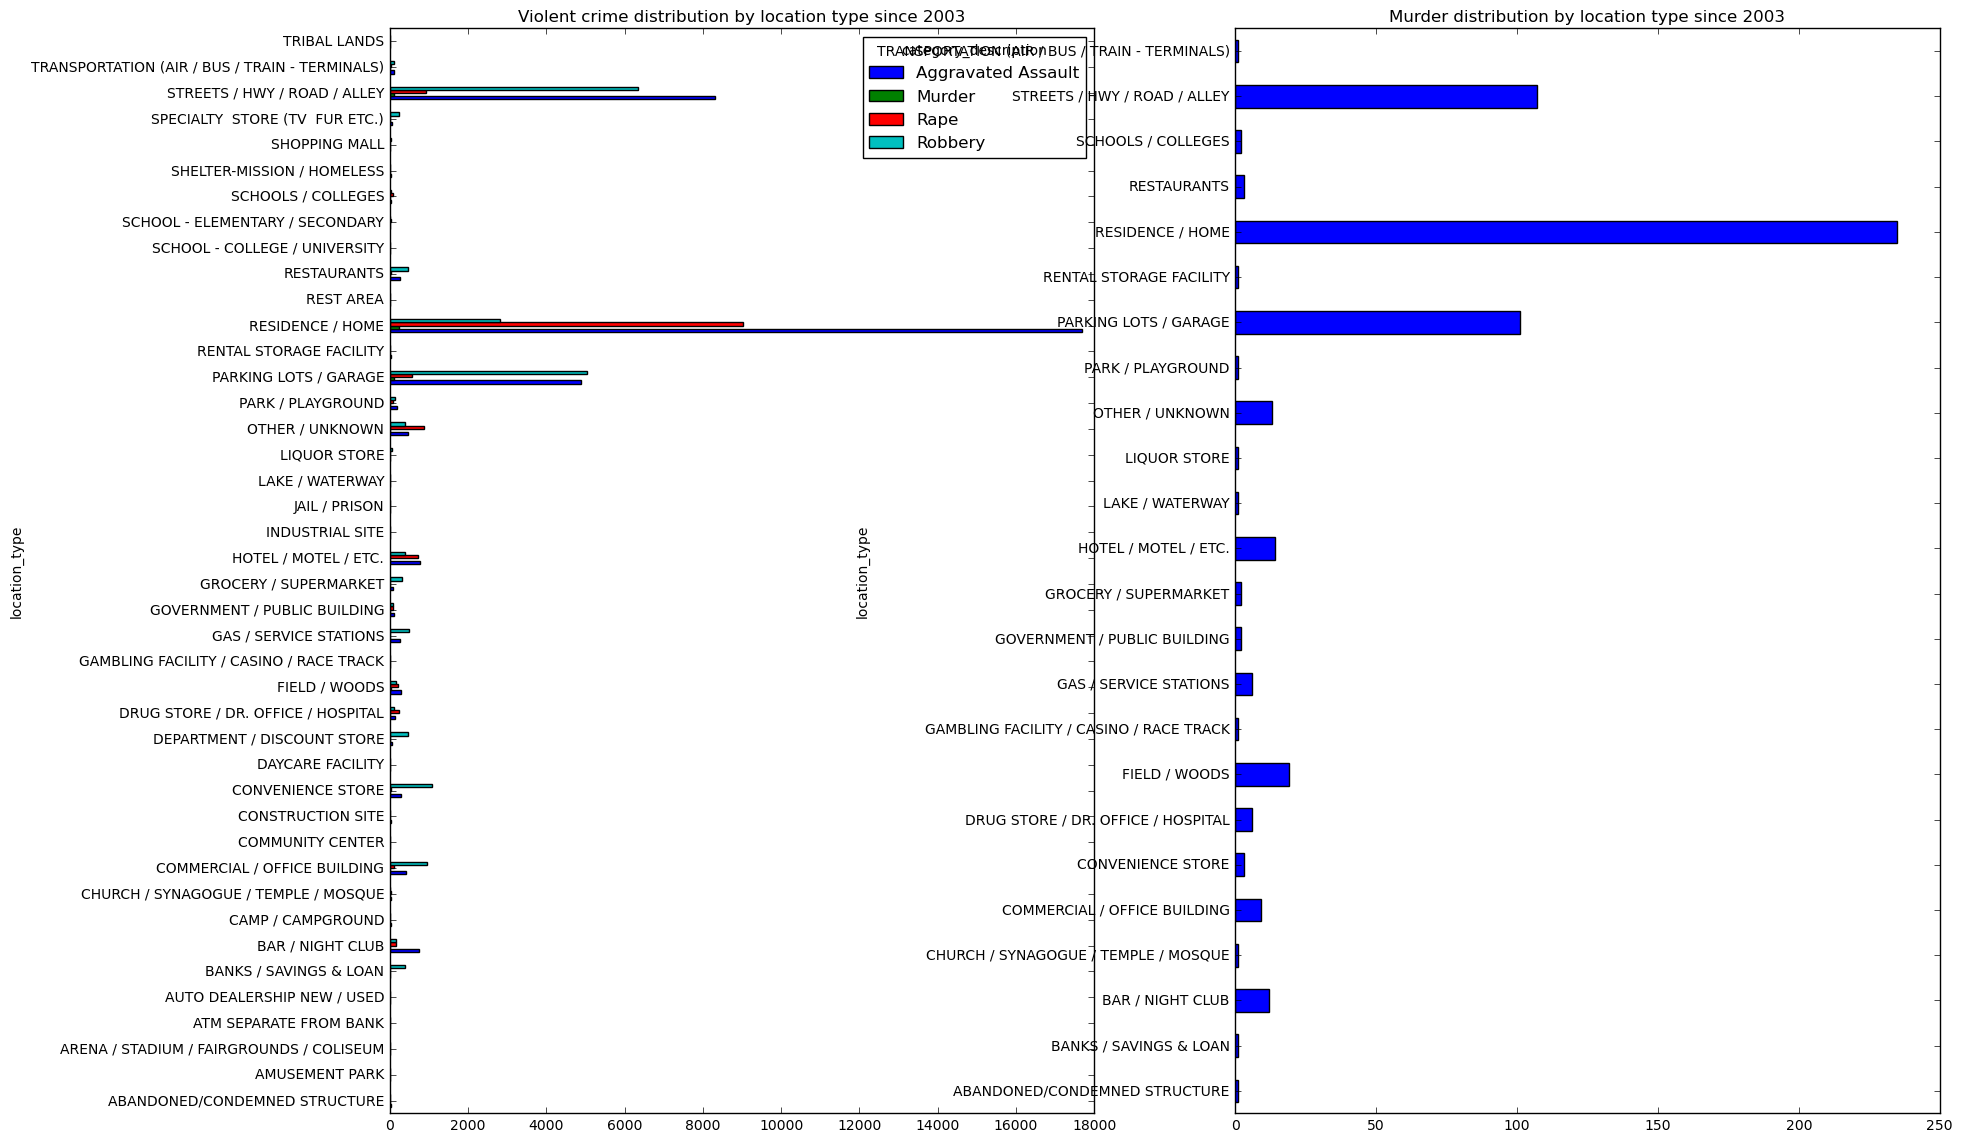

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_mur.location_type, df_mur.category_description
)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False)
    & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
df.address.value_counts().head(50).to_frame()

address
4110 GUADALUPE ST                 11683
1030 NORWOOD PARK BLVD             9260
2901 S CAPITAL OF TEXAS HWY NB     8154
3600 PRESIDENTIAL BLVD             7416
500 E 7TH ST                       6133
1000 E 41ST ST                     5853
3708 S 2ND ST                      5265
2508 E RIVERSIDE DR                4853
11200 LAKELINE MALL DR             4510
9300 S IH 35 SVRD SB               4092
715 E 8TH ST                       4027
9414 N LAMAR BLVD                  3882
1137 GUNTER ST                     3220
710 E BEN WHITE BLVD SVRD WB       3217
6001 AIRPORT BLVD                  2922
12900 N IH 35 SVRD SB              2822
5800 TECHNI CENTER DR              2776
2701 E 7TH ST                      2734
5901 AIRPORT BLVD                  2718
6118 FAIRWAY ST                    2683
1300 CROSSING PL                   2653
1515 WICKERSHAM LN                 2478
2400 S CONGRESS AVE                2446
6409 SPRINGDALE RD                 2445
601 E 15TH ST                      2363
4700 E RIVERSIDE DR                2341
1500 FARO DR                       2326
1600 WICKERSHAM LN                 2253
9500 S IH 35 SVRD SB               2252
1071 CLAYTON LN                    2250
501 E 8TH ST                       2219
1301 CROSSING PL                   2170
12151 N IH 35 SVRD NB              2112
600 BARWOOD PARK                   2111
1700 BURTON DR                     2092
400 E 6TH ST                       2029
3909 N IH 35 SVRD NB               2018
1601 MONTOPOLIS DR                 2004
1124 RUTLAND DR                    1983
9200 NORTH PLZ                     1971
4404 E OLTORF ST                   1970
1704 NELMS DR                      1942
1800 E STASSNEY LN                 1912
12901 N IH 35 SVRD NB              1897
500 CANYON RIDGE DR                1890
10000 N LAMAR BLVD                 1877
2336 DOUGLAS ST                    1853
1054 SPRINGDALE RD                 1806
7000 DECKER LN                     1790
7112 ED BLUESTEIN BLVD SVRD SB     1772

In [26]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

address
00 BLOCK UNKNOWN            164
900 BLOCK E 32ND ST         146
1137 GUNTER ST              142
1030 NORWOOD PARK BLVD      135
500 E 7TH ST                131
6409 SPRINGDALE RD          131
1700 BURTON DR              126
1071 CLAYTON LN             115
9024 NORTHGATE BLVD         109
6103 MANOR RD               108
9200 NORTH PLZ              106
1124 RUTLAND DR             103
1054 SPRINGDALE RD          103

In [27]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(30).to_frame()

address
8800 N IH 35 SVRD SB             3
6409 SPRINGDALE RD               3
8610 N LAMAR BLVD                3
601 E 15TH ST                    3
4700 E RIVERSIDE DR              3
6407 SPRINGDALE RD               3
8225 SAM RAYBURN DR              2
2400 WICKERSHAM LN               2
2501 ANKEN DR                    2
7000 DECKER LN                   2
6118 FAIRWAY ST                  2
9010 GALEWOOD DR                 2
744 W WILLIAM CANNON DR          2
4900 E OLTORF ST                 2
605 MASTERSON PASS               2
2915 S IH 35 SVRD NB             2
8912 N LAMAR BLVD                2
201 W 5TH ST                     2
10503 N LAMAR BLVD               2
833 FAIRFIELD DR                 2
10610 MORADO CIR                 2
815 W SLAUGHTER LN               2
9220 N IH 35 SVRD SB             2
200 BLOCK E 6TH ST               2
1200 BLOCK E 38TH HALF ST        2
9601 MIDDLE FISKVILLE RD         2
1137 GUNTER ST                   2
11105 N IH 35 SVRD NB            2
1050 SPRINGDALE RD               2
7330 BLUFF SPRINGS RD            2

In [28]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")

NameError: name 'df_53' is not defined